In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## PART-A

In [169]:
# finding distance between two points
def euclid_distance(point1,point2):
    return np.sqrt(np.sum(point1 - point2)**2)

### Ward Linkage

considering distance between centroids as proximal measure

In [170]:
def wl(df,cluster1,cluster2):
    n1 = len(cluster1)
    n2 = len(cluster2)
    points1 = []
    for i in cluster1:
        points1.append(df[i,:2])
    points2 = []
    for j in cluster2:
        points2.append(df[j,:2])

    centroid1 = np.mean(points1,axis=0)
    centroid2 = np.mean(points2,axis=0)

    dist = ((n1*n2)/(n1+n2))*((euclid_distance(centroid1,centroid2))**2)

    return dist

In [171]:
def hc_wl(df,min_c):
    clusters = [[c] for c in range(df.shape[0])]
    while len(clusters) > min_c:
        D = np.ones((len(clusters),len(clusters)))*np.inf
        for k in range(len(clusters)):
            for l in range(k+1,len(clusters)):
                D[k][l] = wl(df,clusters[k],clusters[l])
        #initially 150 clusters,as loop proceeds they will converge
        #i -> row no. of min element j -> column no. of min element
        #we have to group i and j into a single cluster
        i,j = np.unravel_index(D.argmin(),D.shape)
        clusters[i] = clusters[i] + clusters[j]
        del clusters[j]
        
    return clusters

### Single Linkage

considering the minimum distance between them as proximal measure

In [82]:
def sl(df,cluster1,cluster2):
    dist = np.inf        
    for i in cluster1:
        for j in cluster2:
            e_dist = euclid_distance(df[i,:2],df[j,:2])
            dist = min(dist,e_dist)
                
    return dist

In [173]:
def hc_sl(df,min_c):
    clusters = [[c] for c in range(df.shape[0])]
    while len(clusters) > min_c:
        D = np.ones((len(clusters),len(clusters)))*np.inf
        for k in range(len(clusters)):
            for l in range(k+1,len(clusters)):
                D[k][l] = sl(df,clusters[k],clusters[l])
        #initially 150 clusters,as loop proceeds they will converge
        #i -> row no. of min element j -> column no. of min element
        #we have to group i and j into a single cluster
        i,j = np.unravel_index(D.argmin(),D.shape)
        clusters[i] = clusters[i] + clusters[j]
        del clusters[j]
        
    return clusters

### 1. concentric_circles_data.csv

In [174]:
data = pd.read_csv("concentric_circles_data.csv")
data.head()

,x,y,label
0,-0.127005,-0.343725,1
1,0.068822,0.974232,0
2,-0.028160,-0.417586,1
3,-0.340097,0.288248,1
4,-0.360430,0.205361,1


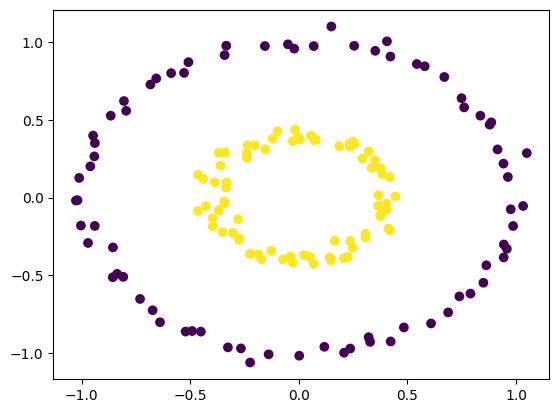

In [175]:
plt.scatter(data['x'],data['y'],c=data['label'])

In [176]:
data_numpy = data.to_numpy()

In [177]:
w_clusters = hc_wl(data_numpy,min_c=2)

In [178]:
# 2 clusters

x_wcluster1 = [data_numpy[i,0] for i in w_clusters[0]]
y_wcluster1 = [data_numpy[i,1] for i in w_clusters[0]]

x_wcluster2 = [data_numpy[i,0] for i in w_clusters[1]]
y_wcluster2 = [data_numpy[i,1] for i in w_clusters[1]]

In [179]:
s_clusters = hc_sl(data_numpy,min_c=2)

In [180]:
# 2 clusters

x_scluster1 = [data_numpy[i,0] for i in s_clusters[0]]
y_scluster1 = [data_numpy[i,1] for i in s_clusters[0]]

x_scluster2 = [data_numpy[i,0] for i in s_clusters[1]]
y_scluster2 = [data_numpy[i,1] for i in s_clusters[1]]

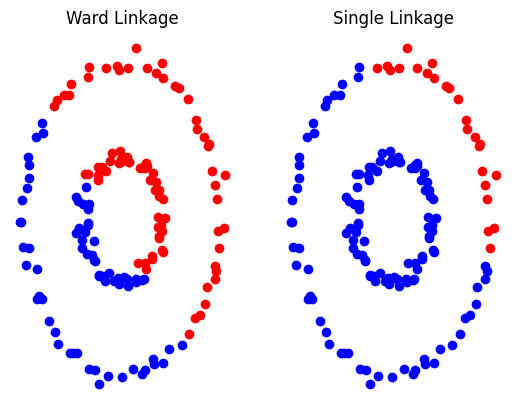

In [181]:
fig,ax = plt.subplots(nrows=1,ncols=2)

ax[0].scatter(x_wcluster1,y_wcluster1,color = 'b')
ax[0].scatter(x_wcluster2,y_wcluster2,color = 'r')
ax[0].axis('off')
ax[0].set_title('Ward Linkage')

ax[1].scatter(x_scluster1,y_scluster1,color = 'b')
ax[1].scatter(x_scluster2,y_scluster2,color = 'r')
ax[1].set_title('Single Linkage')
ax[1].axis('off')

plt.show()

### 2.blobs_data.csv

In [93]:
data = pd.read_csv("blobs_data.csv")
data.head()

,Feature1,Feature2,Label
0,-1.136694,8.107737,3
1,-1.887462,6.409287,3
2,0.107319,1.870739,2
3,-1.493958,2.783110,2
4,-0.423303,3.975821,2


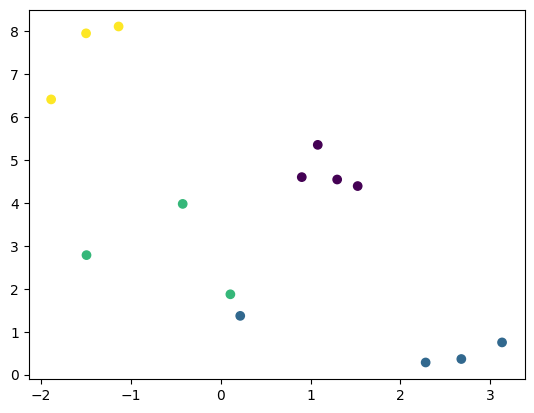

In [95]:
plt.scatter(data['Feature1'],data['Feature2'],c=data['Label'])

In [96]:
data_numpy = data.to_numpy()

In [97]:
w_clusters = hc_wl(data_numpy,min_c=4)

In [98]:
# 4 clusters

x_wcluster1 = [data_numpy[i,0] for i in w_clusters[0]]
y_wcluster1 = [data_numpy[i,1] for i in w_clusters[0]]

x_wcluster2 = [data_numpy[i,0] for i in w_clusters[1]]
y_wcluster2 = [data_numpy[i,1] for i in w_clusters[1]]

x_wcluster3 = [data_numpy[i,0] for i in w_clusters[2]]
y_wcluster3 = [data_numpy[i,1] for i in w_clusters[2]]

x_wcluster4 = [data_numpy[i,0] for i in w_clusters[3]]
y_wcluster4 = [data_numpy[i,1] for i in w_clusters[3]]

In [101]:
s_clusters = hc_sl(data_numpy,min_c=4)

In [102]:
# 4 clusters

x_scluster1 = [data_numpy[i,0] for i in s_clusters[0]]
y_scluster1 = [data_numpy[i,1] for i in s_clusters[0]]

x_scluster2 = [data_numpy[i,0] for i in s_clusters[1]]
y_scluster2 = [data_numpy[i,1] for i in s_clusters[1]]

x_scluster3 = [data_numpy[i,0] for i in s_clusters[2]]
y_scluster3 = [data_numpy[i,1] for i in s_clusters[2]]

x_scluster4 = [data_numpy[i,0] for i in s_clusters[3]]
y_scluster4 = [data_numpy[i,1] for i in s_clusters[3]]

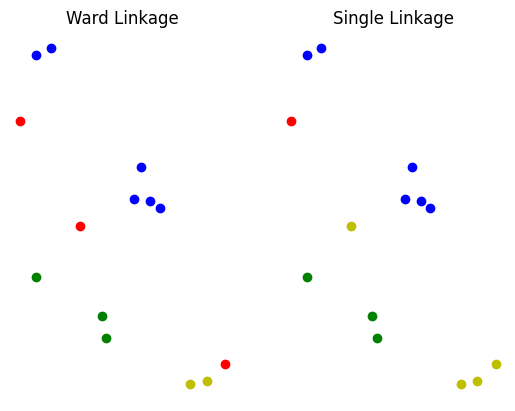

In [103]:
fig,ax = plt.subplots(nrows=1,ncols=2)

ax[0].scatter(x_wcluster1,y_wcluster1,color = 'b')
ax[0].scatter(x_wcluster2,y_wcluster2,color = 'r')
ax[0].scatter(x_wcluster3,y_wcluster3,color = 'g')
ax[0].scatter(x_wcluster4,y_wcluster4,color = 'y')
ax[0].axis('off')
ax[0].set_title('Ward Linkage')

ax[1].scatter(x_scluster1,y_scluster1,color = 'b')
ax[1].scatter(x_scluster2,y_scluster2,color = 'r')
ax[1].scatter(x_scluster3,y_scluster3,color = 'g')
ax[1].scatter(x_scluster4,y_scluster4,color = 'y')
ax[1].set_title('Single Linkage')
ax[1].axis('off')

plt.show()

### 3. Dendroids

In [106]:
from scipy.cluster.hierarchy import dendrogram, linkage

#### For close_concentric_circles_data.csv

In [108]:
data = pd.read_csv("close_concentric_circles_data.csv")
data.head()

,x,y,label
0,-0.194235,-0.584516,1
1,0.068822,0.974232,0
2,-0.054292,-0.666216,1
3,-0.542351,0.435194,1
4,-0.584357,0.316520,1


In [109]:
data_numpy = data.to_numpy()

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [60.0, 60.0, 80.0, 80.0],
  [40.0, 40.0, 70.0, 70.0],
  [12.5, 12.5, 55.0, 55.0],
  [95.0, 95.0, 105.0, 105.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [100.0, 100.0, 122.5, 122.5],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [152.5, 152.5, 182.5, 182.5],
  [111.25, 111.25, 167.5, 167.5],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [252.5, 252.5, 282.5, 282.5],
  [220.0, 220.0, 267.5, 267.5],
  [139.375, 139.375, 243.75, 243.75],
  [33.75, 33.75, 191.5625, 191.5625],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [355.0, 355.0, 365

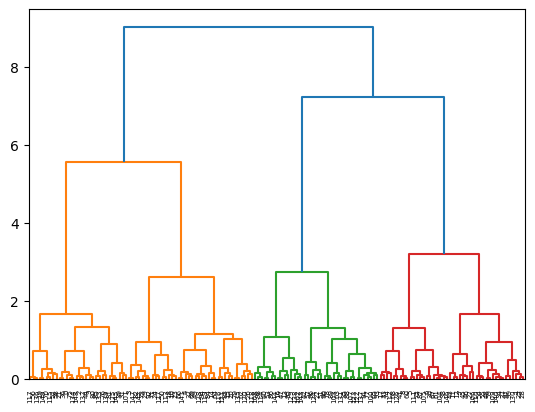

In [111]:
dendrogram(linkage(data_numpy[:,:2], "ward"))

#### For far_concentric_circles_data.csv

In [112]:
data = pd.read_csv("far_concentric_circles_data.csv")
data.head()

,x,y,label
0,-0.100113,-0.247409,1
1,0.068822,0.974232,0
2,-0.017707,-0.318134,1
3,-0.259195,0.229469,1
4,-0.270858,0.160898,1


In [113]:
data_numpy = data.to_numpy()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [50.0, 50.0, 72.5, 72.5],
  [20.0, 20.0, 61.25, 61.25],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [102.5, 102.5, 132.5, 132.5],
  [155.0, 155.0, 165.0, 165.0],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [160.0, 160.0, 190.0, 190.0],
  [117.5, 117.5, 175.0, 175.0],
  [40.625, 40.625, 146.25, 146.25],
  [215.0, 215.0, 225.0, 225.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [220.0, 220.0, 243.75, 243.75],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [335.0, 335.0, 345.0, 345.0],
  [312.5, 312.5, 340.0, 340.0],
  [282.5, 282.5, 326.25, 3

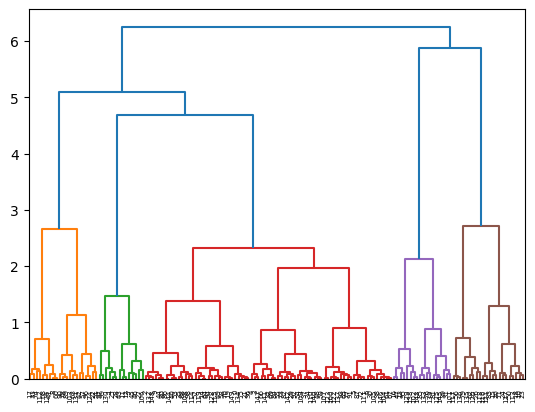

In [114]:
dendrogram(linkage(data_numpy[:,:2], "ward"))

## PART-B

### K-MEDIOD

In [136]:
data = pd.read_csv('kmedoids_data.csv')
data.head()

,Feature_1,Feature_2
0,5.590242,-10.556103
1,2.390125,5.185763
2,3.403854,4.942165
3,3.045117,4.334937
4,-7.728343,5.276341


In [137]:
data_numpy = data.to_numpy()

In [152]:
def k_medoids(df,k,iters):
    medoids = np.random.choice(len(data),size=k,replace=False)
    prev_medoids = np.array([-1]*k)

    iter = 0
    while not np.all(medoids == prev_medoids) and iter < iters:
        clusters = [[] for i in range(k)]

        for i in range(len(df)):
            dist = np.linalg.norm(df[i] - df[medoids],axis=1)
            c = np.argmin(dist)
            clusters[c].append(i)

        prev_medoids = medoids.copy()

        for i in range(k):
            cluster_points = np.array(clusters[i])
            if len(cluster_points) == 0:
                continue
            costs = np.sum(np.linalg.norm(df[cluster_points,np.newaxis]- df[cluster_points],axis=0))
            new_medoid = cluster_points[np.argmin(costs)]
            if new_medoid != medoids[i]:
                medoids[i] = new_medoid

        iter += 1

    return medoids,clusters

In [153]:
medoids,clusters = k_medoids(data_numpy,4,100)

In [154]:
# 4 clusters

x_cluster1 = [data_numpy[i,0] for i in clusters[0]]
y_cluster1 = [data_numpy[i,1] for i in clusters[0]]

x_cluster2 = [data_numpy[i,0] for i in clusters[1]]
y_cluster2 = [data_numpy[i,1] for i in clusters[1]]

x_cluster3 = [data_numpy[i,0] for i in clusters[2]]
y_cluster3 = [data_numpy[i,1] for i in clusters[2]]

x_cluster4 = [data_numpy[i,0] for i in clusters[3]]
y_cluster4 = [data_numpy[i,1] for i in clusters[3]]

In [155]:
# 4  medoids

x_medoid1 = data_numpy[medoids[0],0]
y_medoid1 = data_numpy[medoids[0],1]

x_medoid2 = data_numpy[medoids[1],0]
y_medoid2 = data_numpy[medoids[1],1]

x_medoid3 = data_numpy[medoids[2],0]
y_medoid3 = data_numpy[medoids[2],1]

x_medoid4 = data_numpy[medoids[3],0]
y_medoid4 = data_numpy[medoids[3],1]


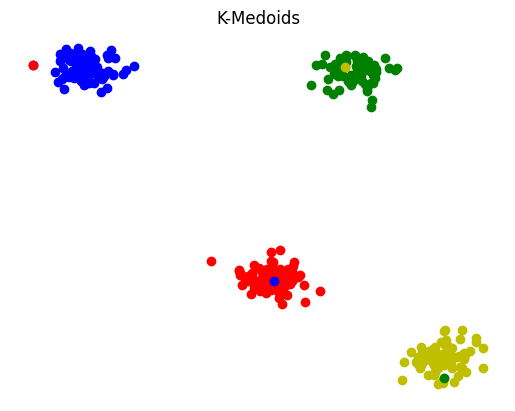

In [156]:
fig,ax = plt.subplots(nrows=1,ncols=1)

ax.scatter(x_cluster1,y_cluster1,color = 'b')
ax.scatter(x_medoid1 ,y_medoid1,color = 'r' )
ax.scatter(x_cluster2,y_cluster2,color = 'r')
ax.scatter(x_medoid2,y_medoid2,color='b')
ax.scatter(x_cluster3,y_cluster3,color = 'g')
ax.scatter(x_medoid3,y_medoid3,color='y')
ax.scatter(x_cluster4,y_cluster4,color = 'y')
ax.scatter(x_medoid4,y_medoid4,color='g')
ax.axis('off')
ax.set_title('K-Medoids')


plt.show()